d-sandbox

<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://databricks.com/wp-content/uploads/2018/03/db-academy-rgb-1200px.png" alt="Databricks Learning" style="width: 600px; height: 163px">
</div>

# Exploratory Analysis

Exploratory data analysis, or EDA, builds intuition from your data.  This lesson introduces the objectives and strategies for EDA including summary statistics, basic plotting, and correlations.

## ![Spark Logo Tiny](https://files.training.databricks.com/images/105/logo_spark_tiny.png) In this lesson you:<br>
* Identify the main objectives of exploratory analysis
* Calculate statistical moments to determine the center and spread of data
* Create plots of data including histograms and scatterplots
* Calculate correlations between variables
* Explore more advanced plots to visualize the relation between variables

<iframe  
src="//fast.wistia.net/embed/iframe/baptj0tmzh?videoFoam=true"
style="border:1px solid #1cb1c2;"
allowtransparency="true" scrolling="no" class="wistia_embed"
name="wistia_embed" allowfullscreen mozallowfullscreen webkitallowfullscreen
oallowfullscreen msallowfullscreen width="640" height="360" ></iframe>
<div>
<a target="_blank" href="https://fast.wistia.net/embed/iframe/baptj0tmzh?seo=false">
  <img alt="Opens in new tab" src="https://files.training.databricks.com/static/images/external-link-icon-16x16.png"/>&nbsp;Watch full-screen.</a>
</div>

-sandbox
### Exploratory Data Analysis

The goal of exploratory data analysis (EDA) is to build the intuition into a dataset that will inform how you model the data.  Models are only as strong as data that is fed into them and the more insight a data scientist has into their data, the stronger the features they'll create are and the more informed their design choices will be.

<div><img src="https://files.training.databricks.com/images/eLearning/ML-Part-1/eda.png" style="height: 500px; margin: 20px"/></div>

Exploratory analysis focuses on the following:<br><br>

1. Gain basic intuition into the data
  - What does each feature represent?
  - Are your features categorical or continuous?
  - What data needs to be encoded? (e.g. mapping a variable for gender to a number)
  - What data types are you working with? (e.g. integers, strings)
2. How is the data distributed?
  - What is the mean, median, and/or mode of each variable?
  - What is the variance, or spread, of each variable?
  - Are there outliers?  Missing values?
3. How can we visualize the data?
  - Histograms, scatterplots, and boxplots
  - Correlation plots
4. What hypotheses will I test with my models?
  - What features are correlated?
  - What are our ideal features and how can we build them if they're not already available?

Run the following cell to set up our environment.

In [0]:
%run "./Includes/Classroom-Setup"

Initialized classroom variables & functions...

Datasets are already mounted to /mnt/training from s3a://databricks-corp-training/common

Imported Test Library...

All done!

-sandbox
### Count, Mean, and Standard Deviation

One way to start the EDA process is to calculate **n**, or the number of observations in the dataset, as well as the center and spread of the data.  We can break this down in the following way:<br><br>

1. Count gives us the number of observed values, indicating the size of the dataset and whether there are missing values.
2. Mean gives us the center of the data.  This could also be accomplished with the median or mode, depending on the data.
3. Standard deviation quantifies how spread out the data is from the mean.  A small standard deviation indicates that the data is closely centered on the mean.

<div><img src="https://files.training.databricks.com/images/eLearning/ML-Part-1/standard-deviation.png" style="height: 250px; margin: 20px"/></div>

This chart indicates how to interpret standard deviation.  68% of the data is within one standard deviation (represented by `σ`) from the mean.

<img alt="Side Note" title="Side Note" style="vertical-align: text-bottom; position: relative; height:1.75em; top:0.05em; transform:rotate(15deg)" src="https://files.training.databricks.com/static/images/icon-note.webp"/> See the <a href="https://en.wikipedia.org/wiki/Standard_deviation" target="_blank">Wikipedia article on Standard Deviation for more details on standard deviation.</a>

Import the Boston dataset and call the `.describe()` method on it.

In [0]:
bostonDF = (spark.read
  .option("HEADER", True)
  .option("inferSchema", True)
  .csv("/mnt/training/bostonhousing/bostonhousing/bostonhousing.csv")
  .drop("_c0")
)

display(bostonDF.describe())# show dataframe using .describe()

summary,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506,506,506,506,506,506,506,506,506,506,506,506,506,506
mean,3.6135235573122535,11.363636363636363,11.136778656126504,0.0691699604743083,0.5546950592885372,6.284634387351787,68.57490118577078,3.795042687747034,9.549407114624506,408.2371541501976,18.455533596837967,356.67403162055257,12.653063241106723,22.532806324110698
stddev,8.601545105332491,23.32245299451514,6.860352940897589,0.2539940413404101,0.11587767566755584,0.7026171434153232,28.148861406903595,2.10571012662761,8.707259384239366,168.53711605495903,2.1649455237144455,91.29486438415782,7.141061511348571,9.197104087379815
min,0.00632,0.0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73,5.0
max,88.9762,100.0,27.74,1,0.871,8.78,100.0,12.1265,24,711,22.0,396.9,37.97,50.0


This shows that there are 506 observations in our dataset with no missing values since the counts of our records are all equal.  Take a look at just the output variable `medv`.

In [0]:
# Now, display "medv"
display(bostonDF.select("medv").describe())

summary,medv
count,506
mean,22.532806324110698
stddev,9.197104087379815
min,5.0
max,50.0


-sandbox
As seen with the mean and standard deviation, the average house price is $22,532 with 68% of the observations within $9,197 of that average.

<img alt="Side Note" title="Side Note" style="vertical-align: text-bottom; position: relative; height:1.75em; top:0.05em; transform:rotate(15deg)" src="https://files.training.databricks.com/static/images/icon-note.webp"/> `medv` is in 1000's of dollars

-sandbox
### Plotting, Distributions, and Outliers

Anscombe's Quartet is a set of four datasets that have identical means, standard deviations, and correlations.  Despite the fact that the descriptive statistics are the same, the underlying data is very different.  This is a cautionary tale for why data should always be plotted in the EDA phase.

<div><img src="https://files.training.databricks.com/images/eLearning/ML-Part-1/anscombes_quartet.svg" style="height: 400px; margin: 20px"/></div>

Plotting of a single variable is normally first done using a histogram.  This plots the general distribution of the data with the value on the x axis and the frequency the value appears on the y axis.  Plotting of two variables is normally first done with a scatterplot.

<img alt="Side Note" title="Side Note" style="vertical-align: text-bottom; position: relative; height:1.75em; top:0.05em; transform:rotate(15deg)" src="https://files.training.databricks.com/static/images/icon-note.webp"/> For plotting a single variable in a more more rigorous way, use <a href="https://en.wikipedia.org/wiki/Kernel_density_estimation" target="_blank">kernel density estimation</a> plots instead of histograms.

-sandbox
Plot a histogram of the median value in the housing dataset.  Display this column, click on the plotting option, and visualize it as a histogram.

<div><img src="https://files.training.databricks.com/images/eLearning/ML-Part-1/plotting.png" style="height: 300px; margin: 20px"/></div>

In [0]:
display(bostonDF.select("medv"))

medv
24.0
21.6
34.7
33.4
36.2
28.7
22.9
27.1
16.5
18.9


This plot shows the general distribution of median housing prices divided into 20 bins.  Now take a look at how the number of rooms compares to the median value.  Do this by selecting the scatterplot option from the plotting dropped menu.

In [0]:
display(bostonDF.select("rm", "medv"))

rm,medv
6.575,24.0
6.421,21.6
7.185,34.7
6.998,33.4
7.147,36.2
6.43,28.7
6.012,22.9
6.172,27.1
5.631,16.5
6.004,18.9


By clicking the "LOESS" box under Plot Options, a local regression line is added showing the trend.

-sandbox
Databricks notebooks can display plots generated in pure Python:<br><br>

1. Import `matplotlib`, `pandas`, and `seaborn`
2. Create a `fig` object
3. Use the `.toPandas()` DataFrame method to turn the Spark DataFrame into a Pandas DataFrame.  This way we can use Python's plotting libraries
4. Use the `scatter_matrix` pandas function to plot a matrix of scatterplots

<img alt="Caution" title="Caution" style="vertical-align: text-bottom; position: relative; height:1.3em; top:0.0em" src="https://files.training.databricks.com/static/images/icon-warning.svg"/> Do not use `.toPandas()` on large datasets since a Pandas DataFrame must fit into the driver node of a cluster.

Plot a scatter matrix using the `pandas` Python library.

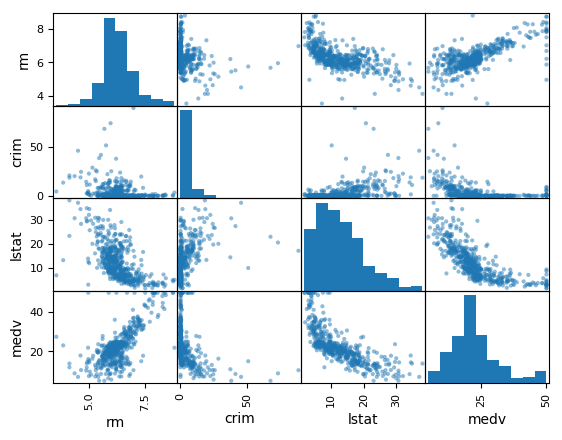

In [0]:
%python
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # importing for a better color scheme

try:
  bostonDF
except NameError: # Looks for local table if bostonDF not defined
  bostonDF = spark.table("boston")

# use matplotlib subplots
fig, ax = plt.subplots()
# create a pandas dataframe from spark dataframe, using "rm", "crim", "lstat", "medv"
pandasDF = bostonDF.select("rm","crim","lstat","medv").toPandas()
# plot the pandas dataframe using scatter matrix
pd.plotting.scatter_matrix(pandasDF)
display(fig.figure)

The above plot shows histograms on the diagonal and scatterplots in the other quadrants.  The plot in the upper-left hand quarter is a histogram of the `rm` variable and the plot to its right is a scatterplot with `rm` as the y axis and `crim` as the x axis.  This shows us correlations across our variables.

-sandbox
### Correlations

Correlation is the first way of understanding the relationship between two variables.  The correlation of two variables is the degree to which one variable increases linearly with the other:<br><br>

* A positive correlation of 1 means that for each unit increase in one variable, the same increase is seen in the other
* A negative correlation of -1 means that for each unit increase in one variable, the same decrease is seen in the other
* A correlation of 0 means that there is no association between the variables

More formally, correlation is computed as the following:<br><br>

<div><img src="https://files.training.databricks.com/images/eLearning/ML-Part-1/correlation.svg" style="height: 60px; margin: 20px"/></div>

The correlation of variables X and Y is their covariance over the standard deviation of X multiplied by the standard deviation of Y.  The covariance is calculated by summing up the product of each value minus their respective mean (`μ`).

To deepen our understanding of correlation, add columns to the `bostonDF` DataFrame that accomplishes the following:<br><br>

1. `medvX3`: `medv` multiplied by 3
3. `medvNeg`: `medv` multiplied by -3
4. `random1`: a random number
5. `random2`: a second random number
6. `medvWithNoise`: `medv` multiplied by some random noise
7. `medvWithNegativeNoise`: negative `medv` multiplied by some random noise

In [0]:
from pyspark.sql.functions import col, rand

bostonWithDummyDataDF = (bostonDF
  .select("medv")
  .withColumn("medvX3", col("medv")*3)
  .withColumn("medvNeg", col("medv")*-3)
  .withColumn("random1", rand(seed=41))
  .withColumn("random2", rand(seed=44))
  .withColumn("medvWithNoise", col("medv")*col("random1"))
  .withColumn("medvWithNegativeNoise", col("medv")*col("random1")*-1)
)

display(bostonWithDummyDataDF)

medv,medvX3,medvNeg,random1,random2,medvWithNoise,medvWithNegativeNoise
24.0,72.0,-72.0,0.46517581696992505,0.47129200262114224,11.164219607278202,-11.164219607278202
21.6,64.80000000000001,-64.80000000000001,0.5524048845145586,0.5570435775171404,11.931945505514467,-11.931945505514467
34.7,104.10000000000001,-104.10000000000001,0.7274482336570582,0.49781132222308344,25.242453707899923,-25.242453707899923
33.4,100.19999999999999,-100.19999999999999,0.3464440249578812,0.4242408843017984,11.57123043359323,-11.57123043359323
36.2,108.60000000000001,-108.60000000000001,0.28532785423689144,0.8023509138093546,10.32886832337547,-10.32886832337547
28.7,86.1,-86.1,0.20337418139669272,0.37267849453466306,5.836839006085081,-5.836839006085081
22.9,68.69999999999999,-68.69999999999999,0.02168490133810197,0.8950894313839725,0.4965842406425351,-0.4965842406425351
27.1,81.30000000000001,-81.30000000000001,0.39986762775587437,0.742720292534395,10.836412712184195,-10.836412712184195
16.5,49.5,-49.5,0.9292327706310431,0.4281904393664595,15.332340715412212,-15.332340715412212
18.9,56.699999999999996,-56.699999999999996,0.43197171260195555,0.25760153616466275,8.16426536817696,-8.16426536817696


Calculate correlations between all columns and `id`

In [0]:
for col in bostonWithDummyDataDF.columns:
  #TODO use corr function of stat to find out the correlation
  correlation = bostonWithDummyDataDF.stat.corr("medv",col)
  
  print("The correlation between columns 'id' and '{}': \t{}".format(col, correlation))

The correlation between columns 'id' and 'medv': 1.0
The correlation between columns 'id' and 'medvX3': 1.0000000000000004
The correlation between columns 'id' and 'medvNeg': -1.0000000000000004
The correlation between columns 'id' and 'random1': -0.05136186927895015
The correlation between columns 'id' and 'random2': -0.01392812761724272
The correlation between columns 'id' and 'medvWithNoise': 0.5089996917519524
The correlation between columns 'id' and 'medvWithNegativeNoise': -0.5089996917519524

The main takeaways:<br><br>

* The correlation between `id` and itself is 1, as is the correlation between `id` and `id` multiplied by 3.  
* The correlation between `id` and `id` multiplied by -3 is -1.  
* The correlations between `id` and random noise varied based on what was in the noise, but the results were closer to 0.  
* There were stronger positive and negative correlations in random noise multiplied by `id` than in random noise not correlated to `id`

### Other Visualization Tools

There are a number of other helpful visualizations depending on the needs of your data.  These include:<br><br>

* <a href="https://en.wikipedia.org/wiki/Heat_map" target="_blank">Heat maps:</a> similar to a scattermatrix, heatmaps can be especially helpful at visualizing correlations between variables
* <a href="https://en.wikipedia.org/wiki/Box_plot" target="_blank">Box plots:</a> visualizes quantiles and outliers
* <a href="https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot" target="_blank">Q-Q Plots:</a> visualizes two probability distributions
* <a href="https://en.wikipedia.org/wiki/Geographic_information_system" target="_blank">Maps and GIS:</a> visualizes geographically-bound data
* <a href="https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding" target="_blank">t-SNE:</a> plots high dimensional data (i.e. data that has many variables) by projecting it down into two-diminsional plot
* <a href="https://en.wikipedia.org/wiki/Time_series" target="_blank">Time series:</a> plots time-bound variables including run charts, lag plots, and wavelet spectrograms

Assemble all of the `bostonDF` features into a single column `features`.  This allows us to use Spark's built-in correlation functionality.

In [0]:
from pyspark.ml.feature import VectorAssembler

# Get ALL columns in the boston dataframe to VectorAssembler
assembler=VectorAssembler(inputCols=bostonDF.columns,outputCol="features")
# create the model
bostonFeaturizedDF = assembler.transform(bostonDF)

Calculate the correlations across the entire dataset.

In [0]:
from pyspark.ml.stat import Correlation

pearsonCorr = Correlation.corr(bostonFeaturizedDF,'features').collect()[0][0]
pandasDF = pd.DataFrame(pearsonCorr.toArray())

pandasDF.index, pandasDF.columns = bostonDF.columns, bostonDF.columns # Labels our index and columns so we can interpret the results

Plot a heatmap of the correlations.  The redder the value, the stronger the positive correlation and the bluer the value the stronger the negative correlation.  Do this in pure Python rather than Spark because Python has better plotting functionality.

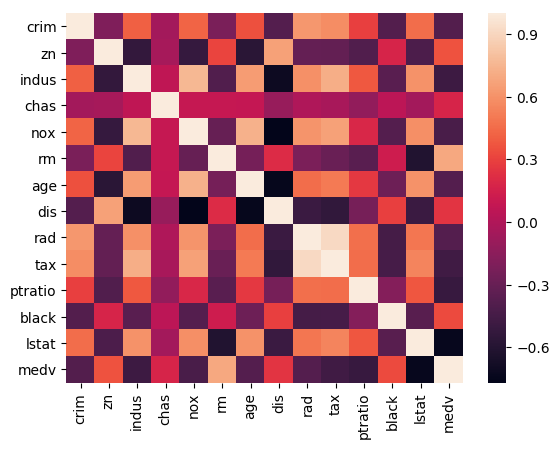

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
# plot pandas dataframe using heatmap in seaborn
sns.heatmap(pandasDF)
display(fig.figure)

## Exercise: EDA on the Bike Sharing Dataset

Do exploratory analysis on the bike sharing dataset by calculating and interpreting summary statistics, creating basic plots, and calculating correlations.

### Step 1: Summary Statistics

Calculate the count, mean, and standard deviation for each variable in the dataset.  What does each variable signify?  What is the spread of the data?

Import the data.

In [0]:
bikeDF = (spark
  .read
  .option("header", True)
  .option("inferSchema", True)
  .csv("/mnt/training/bikeSharing/data-001/hour.csv")
  .drop("instant", "dteday", "casual", "registered", "holiday", "weekday")
)

Calculate count, mean, and standard deviation.

In [0]:
# TODO
display(bikeDF.describe())

summary,season,yr,mnth,hr,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379
mean,2.5016399102364923,0.5025605615973301,6.537775476149376,11.546751826917545,0.6827205247712756,1.425283387997008,0.4969871684216586,0.4757751021347581,0.6272288394038822,0.1900976063064631,189.46308763450142
stddev,1.10691813944808,0.5000078290910193,3.4387757137501724,6.9144050952644776,0.4654306335238818,0.6393568777542525,0.19255612124972202,0.1718502156353594,0.19292983406291458,0.12234022857279034,181.3875990918646
min,1,0,1,0,0,1,0.02,0.0,0.0,0.0,1
max,4,1,12,23,1,4,1.0,1.0,1.0,0.8507,977


### Step 2: Plotting

Create the following plots:<br><br>

1. A histogram of the dependent variable `cnt`
2. A barplot of counts by hour
3. A scattermatrix

Create a histogram of the variable `cnt`.

In [0]:
# TODO
display(bikeDF.select("cnt"))

cnt
16
40
32
13
1
1
2
3
8
14


Create a barplot of counts by hour.

In [0]:
# TODO
display(bikeDF.select("cnt","hr"))

cnt,hr
16,0
40,1
32,2
13,3
1,4
1,5
2,6
3,7
8,8
14,9


Create a scattermatrix.  This can be done in Python or with the built-in Databricks functionality.

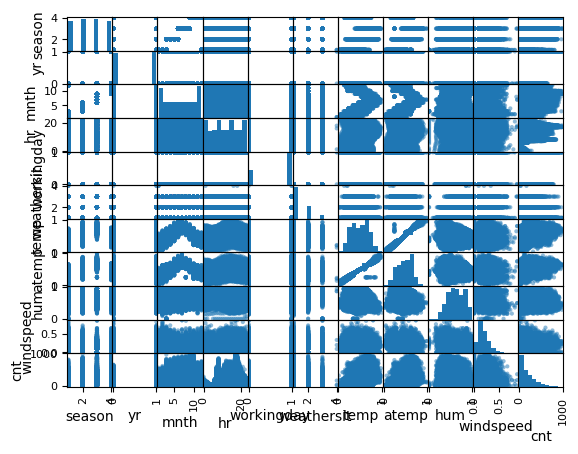

In [0]:
# TODO
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # importing for a better color scheme

# use matplotlib subplots
fig, ax = plt.subplots()
# create a pandas dataframe from spark dataframe, using "rm", "crim", "lstat", "medv"
pandasDF2 = bikeDF.toPandas()
# plot the pandas dataframe using scatter matrix
pd.plotting.scatter_matrix(pandasDF2)
display(fig.figure)

### Step 3: Correlations

Calculate the correlations of the different variables.  Start by using `VectorAssembler` to put all the variables into a single column `features`.

In [0]:
# TODO
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=bikeDF.columns,outputCol="features")
bikeDF2=assembler.transform(bikeDF)

Calculate the correlation on the transformed `bikeDF`

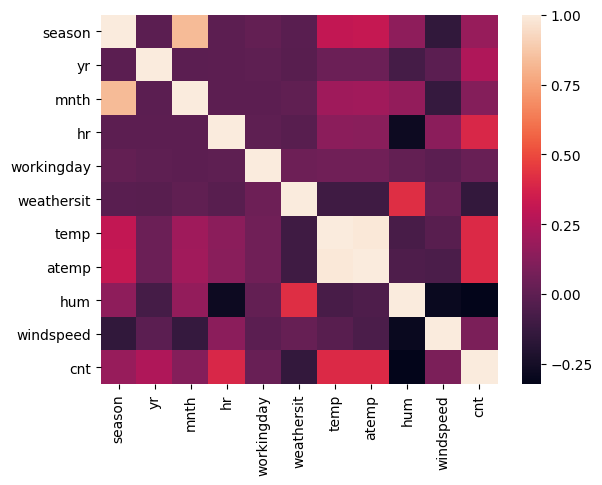

In [0]:
# TODO
from pyspark.ml.stat import Correlation

pearsonCorr = Correlation.corr(bikeDF2,'features').collect()[0][0]
pandasDF2 = pd.DataFrame(pearsonCorr.toArray())

pandasDF2.index, pandasDF2.columns = bikeDF.columns, bikeDF.columns # Labels our index and columns so we can interpret the results

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
# plot pandas dataframe using heatmap in seaborn
sns.heatmap(pandasDF2)
display(fig.figure)

## Review
**Question:** Why is exploratory analysis important?  
**Answer:** The main goal of exploratory analysis is to build intuition from the dataset that will determine future modeling decisions.  This is often an overlooked step.  Having a limited understanding of the data leads to downstream problems like unexpected outputs and errors as well as under-performing models.

**Question:** What summary statistics are helpful?  
**Answer:** The most helpful statistics quantify the center and spread of the data (usually through the mean and standard deviation).  Counts (which reflect missing values) as well as the minimum and maximum are also informative.  A median can be used instead of a mean as well since a median is less influenced by outliers. 

**Question:** What are the most informative plots and how can I do that on Databricks?  
**Answer:** For a single variable, histograms and KDE plots are quite informative.  Box plots or violin plots are helpful as well.  Each shows the distribution of data and outliers in different ways.  When plotting multiple variables, scatterplots and bar charts can be helpful.  Scattermatrixes represent multiple features well.  This can be accomplished on Databricks either by using the built-in plotting functionality or by using the `display()` function to display plots generated with Python libraries like Matplotlib and Seaborn.

**Question:** What is correlation?  
**Answer:** Correlation looks at the linear relationship between two variables.  A positive correlation means that one variable increases linearly relative to another.  A negative correlation means that one variable increases as the other decreases.  No correlation means that the two variables are generally independent.

## Next Steps

Start the next lesson, [ML Workflows]($./04-ML-Workflows ).

## Additional Topics & Resources

**Q:** Where can I find out more information on general mathematical functions in Spark?  
**A:** Check out the Databricks blog post <a href="https://databricks.com/blog/2015/06/02/statistical-and-mathematical-functions-with-dataframes-in-spark.html" target="_blank">Statistical and Mathematical Functions with DataFrames in Spark</a>

**Q:** Where can I find out more information on the machine learning Spark library and statistics?  
**A:** Check out <a href="https://spark.apache.org/docs/latest/ml-statistics.html" target="_blank">the Spark documentation</a>

**Q:** Can I do kernel density estimation in Spark?  
**A:** Yes.  See the <a href="https://spark.apache.org/docs/latest/mllib-statistics.html#kernel-density-estimation" target="_blank">Spark documentation for details</a>

-sandbox
&copy; 2019 Databricks, Inc. All rights reserved.<br/>
Apache, Apache Spark, Spark and the Spark logo are trademarks of the <a href="http://www.apache.org/">Apache Software Foundation</a>.<br/>
<br/>
<a href="https://databricks.com/privacy-policy">Privacy Policy</a> | <a href="https://databricks.com/terms-of-use">Terms of Use</a> | <a href="http://help.databricks.com/">Support</a>